# ADHD dataset

In [97]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import math 
import string
from pathlib import Path
import os
import glob
import mne

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, roc_curve, roc_auc_score, accuracy_score, log_loss, recall_score, precision_score, f1_score, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

# Converting MAT files to CSV files

In [2]:
def mat_to_csv(folder):
    for file in os.listdir(folder):
        file_path= os.path.join(folder,file)
        file_name,type1=file.split(".")
        mat = scipy.io.loadmat(file_path)
        data = pd.DataFrame(mat[file_name])
        data.to_csv(f"{folder}_csv\{file_name}.csv")

In [3]:
mat_to_csv("ADHD")

In [4]:
mat_to_csv("Control")

# Finding minimum File size

In [62]:
all_filenames_ADHD = [i for i in glob.glob('ADHD_csv/*.{}'.format('csv'))]
all_filenames_control = [i for i in glob.glob('Control_csv/*.{}'.format('csv'))]
file_size = []
for f in all_filenames_ADHD:
    o = pd.DataFrame(pd.read_csv(f))
    file_size.append(o.shape[0])
for f in all_filenames_control:
    o = pd.DataFrame(pd.read_csv(f))
    file_size.append(o.shape[0])
file_size
min_file_size = min(file_size)
print("Miimum file size: ",min_file_size)

Miimum file size:  7983


# Mutual Information calculation

In [28]:
df_v10=pd.read_csv("ADHD_csv/v10p.csv")

In [40]:
df_v10=df_v10.drop(['Unnamed: 0'],axis=1)

In [53]:
df_v10=df_v10[0:min_file_size]
df_v10

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,200.0,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,16.0,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,-20.0,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,89.0,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,-20.0,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,367.0,226.0,89.0,156.0,200.0,126.0,126.0,200.0,-20.0,89.0,16.0,236.0,200.0,236.0,200.0,200.0,156.0,50.0,156.0
7979,156.0,85.0,-167.0,-19.0,-94.0,-94.0,-94.0,-20.0,163.0,126.0,-278.0,163.0,-20.0,52.0,52.0,52.0,15.0,-19.0,15.0
7980,297.0,226.0,16.0,156.0,163.0,16.0,126.0,200.0,52.0,126.0,-57.0,200.0,163.0,89.0,236.0,89.0,156.0,156.0,226.0
7981,402.0,226.0,126.0,85.0,236.0,-20.0,310.0,16.0,273.0,52.0,-94.0,126.0,200.0,-20.0,236.0,-57.0,156.0,-19.0,15.0


In [54]:
scl = StandardScaler()
dfv10_norm = scl.fit_transform(df_v10)

In [55]:
dfv10_norm=pd.DataFrame(dfv10_norm,columns=df_v10.columns)
dfv10_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.480780,1.120816,-0.740189,0.698201,-0.129564,1.468896,-0.135353,0.462544,-0.723040,0.676881,0.265841,-0.886344,0.361080,2.226016,-0.205876,0.651465,-0.145230,1.442904,-0.145936
1,-0.106778,0.195240,-1.343819,-0.357043,-0.689689,0.307330,-0.135353,-0.530770,1.423618,0.970372,-0.733588,-1.368036,-0.184891,1.270660,-0.816310,-0.746257,-0.794989,-0.153856,-1.017979
2,-0.845422,-0.269742,-1.947450,-0.776743,-1.061409,0.307330,-0.535669,-0.131285,0.615893,0.391322,-0.929128,-1.612181,-0.184891,1.745089,-0.816310,-0.184130,-1.224076,0.754869,-0.370176
3,0.187001,-0.269742,-0.542637,-0.566893,-0.317970,0.534593,0.064805,-0.331028,-0.453798,-0.489152,-0.337075,-1.368036,0.626687,1.745089,-0.205876,-0.184130,-0.794989,-0.387528,-1.242218
4,-0.845422,-1.190931,-1.947450,-1.825991,-1.809939,-0.854237,-2.120704,-2.112514,-0.453798,-1.068203,-0.929128,-1.856326,-0.457877,1.030197,-1.715462,-0.746257,-1.224076,-0.841891,-2.992532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,0.925645,0.348772,-0.339598,0.068652,0.247247,-0.159822,-0.135353,0.268200,-1.246970,-0.489152,-0.733588,0.565331,0.361080,0.549270,0.404557,0.377997,0.069314,-0.614710,0.072074
7979,0.040112,-0.269742,-1.744410,-0.980597,-1.249814,-1.548652,-1.325482,-0.919458,0.084686,-0.195661,-2.330501,0.083639,-1.262078,-0.646549,-0.816310,-0.746257,-0.794989,-1.062581,-0.806197
7980,0.631866,0.348772,-0.740189,0.068652,0.058841,-0.854237,-0.135353,0.268200,-0.723040,-0.195661,-1.130100,0.327784,0.088094,-0.406085,0.701525,-0.465194,0.069314,0.073325,0.508095
7981,1.072535,0.348772,-0.136558,-0.357043,0.430561,-1.081500,0.860027,-0.725114,0.885134,-0.782643,-1.331072,-0.160506,0.361080,-1.114478,0.701525,-1.574256,0.069314,-1.062581,-0.806197


In [56]:
cols=dfv10_norm.columns
MI_mat=[]
for i in range(len(cols)):
    row=[]
    for j in range(len(cols)):
        row.append(mutual_info_score(dfv10_norm[cols[i]],dfv10_norm[cols[j]]))
    MI_mat.append(row)

In [57]:
MI_df=pd.DataFrame(MI_mat,columns=cols)
MI_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3.122968,0.784440,0.576602,0.335609,0.350861,0.217232,0.281154,0.198161,0.118876,0.123450,0.306445,0.350844,0.244138,0.147058,0.221411,0.171150,0.351000,0.142426,0.153480
1,0.784440,3.012663,0.402225,0.528720,0.261100,0.299048,0.184824,0.263354,0.124469,0.159469,0.317891,0.505840,0.233582,0.180266,0.188346,0.251679,0.317688,0.233330,0.151261
2,0.576602,0.402225,3.003581,0.414792,0.626846,0.280846,0.337096,0.237329,0.082470,0.099467,0.327676,0.294848,0.344569,0.121346,0.307401,0.171514,0.496696,0.146300,0.171162
3,0.335609,0.528720,0.414792,2.969488,0.283603,0.566555,0.151639,0.304399,0.078334,0.129077,0.255597,0.472048,0.211094,0.258177,0.157243,0.281124,0.479117,0.335652,0.173733
4,0.350861,0.261100,0.626846,0.283603,3.008250,0.347053,0.587708,0.341339,0.096898,0.134024,0.276113,0.184722,0.501521,0.138867,0.524156,0.201170,0.286271,0.201547,0.324842
5,0.217232,0.299048,0.280846,0.566555,0.347053,2.878132,0.192630,0.520313,0.061608,0.181130,0.216714,0.278846,0.222918,0.419124,0.190167,0.408868,0.227719,0.503925,0.280095
6,0.281154,0.184824,0.337096,0.151639,0.587708,0.192630,3.020799,0.313693,0.204742,0.200962,0.168625,0.118649,0.301433,0.091457,0.480669,0.134400,0.158367,0.113363,0.328252
7,0.198161,0.263354,0.237329,0.304399,0.341339,0.520313,0.313693,3.006095,0.073993,0.374146,0.202476,0.212940,0.240569,0.255385,0.290736,0.462705,0.159358,0.418332,0.468761
8,0.118876,0.124469,0.082470,0.078334,0.096898,0.061608,0.204742,0.073993,2.703238,0.144624,0.096751,0.066020,0.079712,0.079735,0.106533,0.059936,0.086078,0.067574,0.102511
9,0.123450,0.159469,0.099467,0.129077,0.134024,0.181130,0.200962,0.374146,0.144624,2.626964,0.091649,0.139387,0.104268,0.095997,0.121134,0.261980,0.082857,0.225813,0.198596


In [58]:
avg_MI=[]
for i in range(len(cols)):
    avg_MI.append(MI_df[cols[i]].mean())

In [59]:
avg_MI

[0.43143707048613555,
 0.44211556377773303,
 0.4443560023973669,
 0.4413684401756552,
 0.45667843654051055,
 0.4364696941129734,
 0.3879190765293834,
 0.4391623399880604,
 0.2333737767126906,
 0.28921030373832324,
 0.35636928703715826,
 0.35962876411305633,
 0.3700604200712923,
 0.3204781516458212,
 0.35865128892908293,
 0.3666435741858258,
 0.37071649979054994,
 0.37280892698290075,
 0.3696610438693292]

In [60]:
len(avg_MI)

19

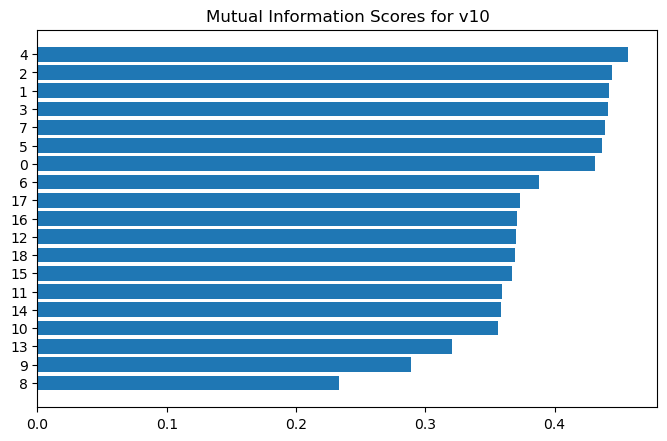

In [61]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores for v10")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(pd.Series(avg_MI))

Finding Mutual information for all ADHD files

In [83]:
all_filenames_ADHD = [i for i in glob.glob('ADHD_csv/*.{}'.format('csv'))]
adhd_MI=[]
for f in all_filenames_ADHD:
    df = pd.read_csv(f)[0:min_file_size]
    df=df.drop(['Unnamed: 0'],axis=1)
    scl = StandardScaler()
    df_norm = scl.fit_transform(df)
    df_norm=pd.DataFrame(df_norm,columns=df.columns)
    cols=df_norm.columns
    MI_mat=[]
    for i in range(len(cols)):
        row=[]
        for j in range(len(cols)):
            row.append(mutual_info_score(df_norm[cols[i]],df_norm[cols[j]]))
        MI_mat.append(row)
    MI_df=pd.DataFrame(MI_mat,columns=cols)
    avg_MI=[]
    for i in range(len(cols)):
        avg_MI.append(MI_df[cols[i]].mean())
    avg_MI.append(1)
    adhd_MI.append(avg_MI)

In [82]:
cols1=[]
for c in cols:
    cols1.append(c)
cols1.append('class')

In [84]:
adhd_df=pd.DataFrame(adhd_MI,columns=cols1)
adhd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class
0,0.431437,0.442116,0.444356,0.441368,0.456678,0.436470,0.387919,0.439162,0.233374,0.289210,0.356369,0.359629,0.370060,0.320478,0.358651,0.366644,0.370716,0.372809,0.369661,1
1,0.446268,0.385899,0.607136,0.604085,0.628450,0.612343,0.590536,0.551488,0.396395,0.366135,0.364185,0.365790,0.477719,0.472333,0.400755,0.496778,0.559508,0.456824,0.507023,1
2,0.583642,0.611919,0.485009,0.630612,0.521004,0.503090,0.511156,0.580371,0.347024,0.537638,0.483004,0.610828,0.420923,0.548183,0.434901,0.539788,0.442463,0.533225,0.505948,1
3,0.518423,0.396613,0.602644,0.378416,0.634500,0.469924,0.589027,0.371955,0.572336,0.339752,0.565939,0.330682,0.528371,0.328935,0.512877,0.296238,0.599837,0.354217,0.548046,1
4,0.251922,0.262980,0.264138,0.270910,0.235119,0.297053,0.274545,0.307268,0.229670,0.294835,0.210597,0.195471,0.205374,0.215023,0.176312,0.208073,0.263625,0.289093,0.261499,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.310192,0.576306,0.386223,0.662955,0.401977,0.688815,0.300896,0.630345,0.281711,0.479262,0.357446,0.650199,0.335689,0.615101,0.226425,0.520447,0.366916,0.634298,0.313969,1
57,0.395820,0.391793,0.361328,0.352332,0.284928,0.302015,0.285311,0.312284,0.234545,0.282314,0.336798,0.316360,0.195510,0.274603,0.214876,0.241306,0.360471,0.288837,0.309732,1
58,0.554888,0.326155,0.611931,0.366350,0.639550,0.360334,0.562920,0.348756,0.507571,0.374723,0.670635,0.347868,0.675010,0.379733,0.584109,0.252634,0.596885,0.360787,0.531860,1
59,0.482539,0.574929,0.565867,0.604712,0.630327,0.592061,0.605194,0.588615,0.527350,0.523464,0.582243,0.533057,0.570766,0.512511,0.529637,0.486646,0.530088,0.473158,0.495314,1


Finding mutual information for all Control files

In [85]:
all_filenames_control = [i for i in glob.glob('control_csv/*.{}'.format('csv'))]
control_MI=[]
for f in all_filenames_control:
    df = pd.read_csv(f)[0:min_file_size]
    df=df.drop(['Unnamed: 0'],axis=1)
    scl = StandardScaler()
    df_norm = scl.fit_transform(df)
    df_norm=pd.DataFrame(df_norm,columns=df.columns)
    cols=df_norm.columns
    MI_mat=[]
    for i in range(len(cols)):
        row=[]
        for j in range(len(cols)):
            row.append(mutual_info_score(df_norm[cols[i]],df_norm[cols[j]]))
        MI_mat.append(row)
    MI_df=pd.DataFrame(MI_mat,columns=cols)
    avg_MI=[]
    for i in range(len(cols)):
        avg_MI.append(MI_df[cols[i]].mean())
    avg_MI.append(0)
    control_MI.append(avg_MI)

In [86]:
control_df=pd.DataFrame(control_MI,columns=cols1)
control_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class
0,0.644279,0.683295,0.684821,0.635593,0.621951,0.601831,0.641545,0.519126,0.646893,0.582725,0.646987,0.649224,0.540312,0.601133,0.659870,0.605005,0.651331,0.599394,0.599786,0
1,0.473806,0.475900,0.503831,0.514722,0.500430,0.515711,0.459670,0.435367,0.393519,0.417647,0.429321,0.463963,0.534828,0.479900,0.396598,0.437641,0.411015,0.472713,0.412962,0
2,1.240580,1.027744,1.250100,1.129884,1.279279,1.120391,1.192923,1.011761,1.088367,0.975307,1.117137,1.020763,1.258613,1.073925,1.139832,0.926734,1.073999,1.013474,1.099422,0
3,0.533556,0.407173,0.608165,0.612638,0.640661,0.633221,0.451935,0.576979,0.553728,0.528087,0.556294,0.549314,0.600978,0.594996,0.533039,0.556836,0.543005,0.576837,0.554650,0
4,0.382444,0.370829,0.375015,0.355040,0.380652,0.343500,0.363658,0.315799,0.354366,0.324689,0.365243,0.348780,0.365621,0.315917,0.337230,0.300822,0.361078,0.331242,0.346218,0
5,0.632322,0.550824,0.681850,0.477125,0.663751,0.577384,0.606256,0.575329,0.543650,0.552568,0.540578,0.546266,0.653519,0.544953,0.558933,0.496320,0.583342,0.495985,0.550173,0
6,0.363283,0.386683,0.374321,0.382660,0.359627,0.298312,0.346488,0.332461,0.355501,0.335347,0.358444,0.356711,0.353303,0.354470,0.309593,0.262796,0.385550,0.296194,0.318435,0
7,0.378432,0.359593,0.335976,0.384514,0.415178,0.363084,0.345301,0.342012,0.367743,0.327638,0.336982,0.350461,0.375357,0.354683,0.325783,0.321837,0.408887,0.359780,0.375686,0
8,0.581951,0.614235,0.624612,0.578071,0.609196,0.656623,0.638153,0.609889,0.654757,0.571725,0.630640,0.603198,0.630001,0.618275,0.659128,0.560130,0.627964,0.582889,0.641065,0
9,0.743503,0.468142,0.604916,0.516082,0.825737,0.495119,0.783866,0.435488,0.740468,0.396673,0.798437,0.413979,0.827546,0.409790,0.783847,0.388708,0.722345,0.415696,0.739170,0


1 -> corresponds to ADHD class <br/>
0 -> corresponds to Control class

In [88]:
df_combined = pd.concat([adhd_df, control_df])
df_combined.reset_index(inplace = True)
df_combined = df_combined.drop('index', axis = 1)
df_combined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class
0,0.431437,0.442116,0.444356,0.441368,0.456678,0.436470,0.387919,0.439162,0.233374,0.289210,0.356369,0.359629,0.370060,0.320478,0.358651,0.366644,0.370716,0.372809,0.369661,1
1,0.446268,0.385899,0.607136,0.604085,0.628450,0.612343,0.590536,0.551488,0.396395,0.366135,0.364185,0.365790,0.477719,0.472333,0.400755,0.496778,0.559508,0.456824,0.507023,1
2,0.583642,0.611919,0.485009,0.630612,0.521004,0.503090,0.511156,0.580371,0.347024,0.537638,0.483004,0.610828,0.420923,0.548183,0.434901,0.539788,0.442463,0.533225,0.505948,1
3,0.518423,0.396613,0.602644,0.378416,0.634500,0.469924,0.589027,0.371955,0.572336,0.339752,0.565939,0.330682,0.528371,0.328935,0.512877,0.296238,0.599837,0.354217,0.548046,1
4,0.251922,0.262980,0.264138,0.270910,0.235119,0.297053,0.274545,0.307268,0.229670,0.294835,0.210597,0.195471,0.205374,0.215023,0.176312,0.208073,0.263625,0.289093,0.261499,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.587176,0.552304,0.471419,0.489503,0.456109,0.417708,0.378135,0.366114,0.382901,0.347281,0.511425,0.467649,0.433424,0.383429,0.424333,0.334473,0.471192,0.394309,0.449429,0
117,0.406968,0.344701,0.435635,0.377683,0.409106,0.357673,0.398022,0.342350,0.387133,0.245966,0.454015,0.338713,0.466733,0.309758,0.432139,0.288716,0.380176,0.504495,0.402557,0
118,0.408578,0.397774,0.378953,0.271165,0.322680,0.376482,0.367769,0.304528,0.385823,0.290188,0.440207,0.321007,0.411734,0.342004,0.408322,0.233716,0.404420,0.335968,0.414331,0
119,0.428667,0.452077,0.319318,0.416091,0.323999,0.407610,0.273032,0.394228,0.275555,0.357975,0.301345,0.404128,0.273062,0.381416,0.255388,0.300885,0.335704,0.415892,0.255864,0


# Topoplot to find global minimum

In [89]:
adhd_min=adhd_df.drop(['class'],axis=1).min(axis = 0)
control_min=control_df.drop(['class'],axis=1).min(axis = 0)

In [100]:
combine_min=pd.DataFrame(np.column_stack([adhd_min,control_min]),columns=["ADHD","Control"])
combine_min

,ADHD,Control
0,0.228278,0.205288
1,0.226161,0.225564
2,0.190741,0.219344
3,0.225997,0.249137
4,0.203057,0.218996
5,0.254276,0.207286
6,0.220047,0.210573
7,0.277449,0.223850
8,0.216828,0.215978
9,0.207970,0.211188


In [141]:
chs = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
fake_info = mne.create_info(ch_names=chs, sfreq=250.,
                            ch_types='eeg')
rng = np.random.RandomState(0)
data = rng.normal(size=(len(chs), 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(biosemi_montage)

<Evoked | '' (average, N=1), 0 – 0 sec, baseline off, 19 ch, ~18 kB>

In [148]:
montage_head = fake_evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in chs])
radius = np.abs(pos[[2, 3], 0]).mean()
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()
print([f'{v:0.5f}' for v in [x, y, z, radius]])

['-0.02934', '-0.06834', '0.06730', '0.05178']


Text(0.5, 1.0, 'Control')

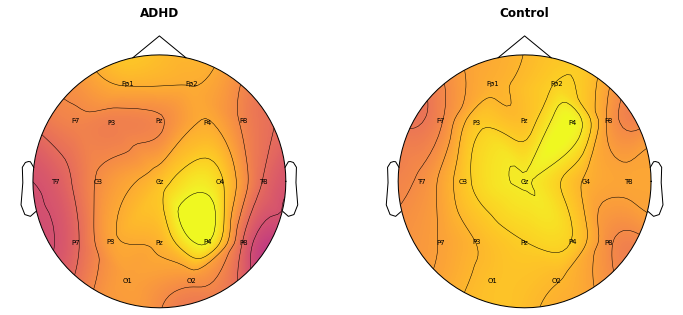

In [150]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 12), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(combine_min['ADHD'],fake_evoked.info, axes=ax[0],cmap='plasma',
                     show=False,sensors=True,names=chs,show_names=True)
mne.viz.plot_topomap(combine_min['Control'],fake_evoked.info, axes=ax[1],cmap='plasma',
                     show=False,sensors=True,names=chs,show_names=True)

# add titles
ax[0].set_title('ADHD', fontweight='bold')
ax[1].set_title('Control', fontweight='bold')

# Principal Component Analysis

In [177]:
X=df_combined.drop(['class'],axis=1)
y=df_combined['class']

In [153]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X)

In [155]:
x_pca.shape

(121, 2)

Text(0, 0.5, 'pc2')

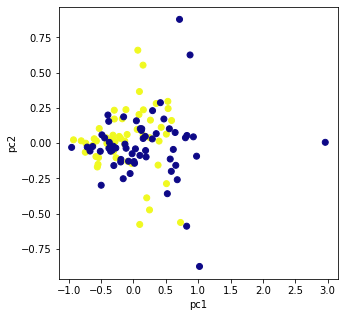

In [157]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')

From the graph we can see that the data is not linearly separable so we cannot reduce to two dimensions.<br/>
Now we will find the optimal number of dimensions using pca.

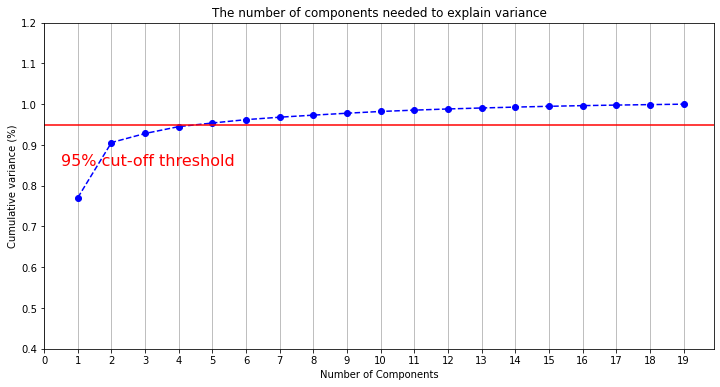

In [179]:
pca1 = PCA().fit(X)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 20, step=1)
y1 = np.cumsum(pca1.explained_variance_ratio_)

plt.ylim(0.4,1.2)
plt.plot(xi, y1, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [166]:
pca1.explained_variance_ratio_

array([0.77094772, 0.13503246, 0.02215803, 0.01686089, 0.0088412 ,
       0.00825536, 0.00597906, 0.00505553, 0.00469873, 0.00430108,
       0.00325426, 0.00289671, 0.00239193, 0.00215643, 0.00197251,
       0.00163752, 0.00133571, 0.00117041, 0.00105447])

Explained Variance Ratio as a metric to evaluate the usefulness of your principal components and to choose how many components to use in your model. The explained variance ratio is the percentage of variance that is attributed by each of the selected components. 
For our dataset in order to get a 95% explained variance we need atleast 5 features(number of components)

In [168]:
opt_pca=PCA(n_components=5)
X_final_PCA=opt_pca.fit_transform(X)

In [169]:
X_pca_df=pd.DataFrame(X_final_PCA,columns=['pca1','pca2','pca3','pca4','pca5'])

In [171]:
X_pca_df

,pca1,pca2,pca3,pca4,pca5
0,-0.219435,0.047274,0.045662,0.059085,0.012727
1,0.252337,0.038495,0.000085,0.282938,-0.051543
2,0.351075,0.280934,0.021629,-0.073810,-0.027603
3,0.204705,-0.388329,-0.021506,0.071740,-0.078597
4,-0.807017,0.016361,-0.095151,0.027533,-0.071296
...,...,...,...,...,...
116,0.030296,-0.040797,0.116189,-0.146387,0.006332
117,-0.197036,-0.133836,-0.031429,0.035901,0.050012
118,-0.303066,-0.159229,-0.068930,-0.090357,0.011707
119,-0.394471,0.199216,0.038811,-0.070813,-0.036190


In [172]:
X_pca_df.shape

(121, 5)

# Functions for accuracy metrics

In [291]:
def plot_roc_curve(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc=roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.title("ROC curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [187]:
def plot_confusion_matrix1(y_test,y_pred):
    conf_matrix=[[0,0],[0,0]]
    y_test1 = [x for x in y_test]
    for i in range(0,len(y_test1)):
        if y_test1[i] == 1 and y_pred[i] == 1: # true positive
            conf_matrix[0][0] += 1
        elif y_test1[i] == 1 and y_pred[i] == 0: # false negative
            conf_matrix[0][1] += 1
        elif y_test1[i] == 0 and y_pred[i] == 1: # false positive
            conf_matrix[1][0] += 1
        elif y_test1[i] == 0 and y_pred[i] == 0: # true negative
            conf_matrix[1][1] += 1
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(2):
        for j in range(2):
            ax.text(x=j, y=i,s=conf_matrix[i][j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

# Building different ML algorithms

# Perceptron

In [175]:
skf = StratifiedKFold(n_splits = 4, random_state = None, shuffle = False)

In [260]:
max0 = 0
y_pred_final_p = []
y_test_final_p = []
for train_index,test_index in skf.split(X, y):
    X_train_p,X_test_p = X.iloc[train_index], X.iloc[test_index]
    y_train_p,y_test_p = y.iloc[train_index], y.iloc[test_index]
    perceptron = Perceptron()
    penalty = ['l1', 'l2']
    alpha = [0.1, 0.01, 0.001, 0.0001, 0.00001]
    hyperparameters = dict(alpha = alpha, penalty = penalty)
    clf_p = GridSearchCV(perceptron, hyperparameters, cv=5, verbose=0)
    best_model = clf_p.fit(X_train_p, y_train_p)
    print("**************************************************************")
    print('Best Parameters',clf_p.best_params_)
    print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
    print('Best C:', best_model.best_estimator_.get_params()['alpha'])
    y_pred_p = clf_p.predict(X_test_p)
    print("Accuracy Score: ", accuracy_score(y_test_p, y_pred_p))
    if accuracy_score(y_test_p, y_pred_p) > max0:
        max0 = accuracy_score(y_test_p, y_pred_p)
        y_test_final_p = list(y_test_p)
        y_pred_final_p = list(y_pred_p)
        X_test_final_p = list(X_test_p)

**************************************************************
Best Parameters {'alpha': 1e-05, 'penalty': 'l1'}
Best Penalty: l1
Best C: 1e-05
Accuracy Score:  0.6451612903225806
**************************************************************
Best Parameters {'alpha': 0.001, 'penalty': 'l1'}
Best Penalty: l1
Best C: 0.001
Accuracy Score:  0.6
**************************************************************
Best Parameters {'alpha': 0.001, 'penalty': 'l1'}
Best Penalty: l1
Best C: 0.001
Accuracy Score:  0.5
**************************************************************
Best Parameters {'alpha': 1e-05, 'penalty': 'l2'}
Best Penalty: l2
Best C: 1e-05
Accuracy Score:  0.7


In [261]:
print("Accuracy for Perceptron model: ", accuracy_score(y_test_final_p, y_pred_final_p))
print("Precision for Perceptron model: ", precision_score(y_test_final_p, y_pred_final_p))
print("Recall for Perceptron model: ", recall_score(y_test_final_p, y_pred_final_p))
print("F1 Score for Perceptron model: ", f1_score(y_test_final_p, y_pred_final_p))
print("Classification Report: \n", classification_report(y_test_final_p, y_pred_final_p))
print("ROC: ",roc_curve(y_test_final_p, y_pred_final_p))
print("Area Under the curve: ", roc_auc_score(y_test_final_p, y_pred_final_p))

Accuracy for Perceptron model:  0.7
Precision for Perceptron model:  0.6666666666666666
Recall for Perceptron model:  0.8
F1 Score for Perceptron model:  0.7272727272727272
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.67      0.80      0.73        15

    accuracy                           0.70        30
   macro avg       0.71      0.70      0.70        30
weighted avg       0.71      0.70      0.70        30

ROC:  (array([0. , 0.4, 1. ]), array([0. , 0.8, 1. ]), array([2, 1, 0], dtype=int64))
Area Under the curve:  0.7000000000000001


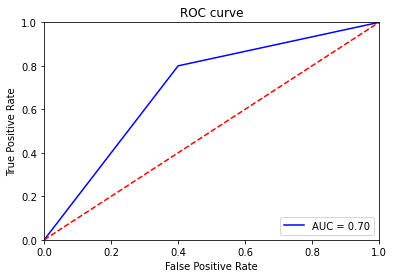

In [292]:
plot_roc_curve(y_test_final_p,y_pred_final_p)

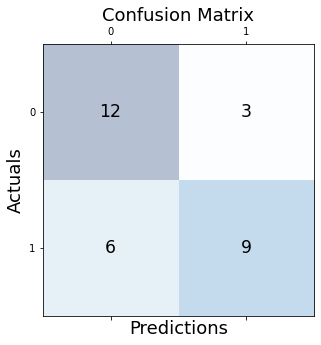

In [262]:
plot_confusion_matrix1(y_test_final_p,y_pred_final_p)

# Logistic Regression

In [263]:
max0 = 0
y_pred_final_log = []
y_test_final_log = []
for train_index,test_index in skf.split(X, y):
    X_train_log,X_test_log = X.iloc[train_index], X.iloc[test_index]
    y_train_log,y_test_log = y.iloc[train_index], y.iloc[test_index]
    log = LogisticRegression()
    penalty = ['l1', 'l2']
    c = [0.1, 0.2, 0.003, 0.02, 0.005]
    hyperparameters = dict(C=c,penalty=penalty)
    clf_log = GridSearchCV(log, hyperparameters, cv=5, verbose=0)
    best_model = clf_log.fit(X_train_log, y_train_log)
    print("**************************************************************")
    print('Best Parameters',clf_log.best_params_)
    print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
    print('Best C:', best_model.best_estimator_.get_params()['C'])
    y_pred_log = clf_log.predict(X_test_log)
    print("Accuracy Score: ", accuracy_score(y_test_log, y_pred_log))
    if accuracy_score(y_test_log, y_pred_log) > max0:
        max0 = accuracy_score(y_test_log, y_pred_log)
        y_test_final_log = list(y_test_log)
        y_pred_final_log = list(y_pred_log)
        X_test_final_log = list(X_test_log)

**************************************************************
Best Parameters {'C': 0.1, 'penalty': 'l2'}
Best Penalty: l2
Best C: 0.1
Accuracy Score:  0.6451612903225806
**************************************************************
Best Parameters {'C': 0.1, 'penalty': 'l2'}
Best Penalty: l2
Best C: 0.1
Accuracy Score:  0.6
**************************************************************
Best Parameters {'C': 0.1, 'penalty': 'l2'}
Best Penalty: l2
Best C: 0.1
Accuracy Score:  0.5666666666666667
**************************************************************
Best Parameters {'C': 0.1, 'penalty': 'l2'}
Best Penalty: l2
Best C: 0.1
Accuracy Score:  0.6


In [264]:
print("Accuracy for Logistic model: ", accuracy_score(y_test_final_log, y_pred_final_log))
print("Precision for Logistic model: ", precision_score(y_test_final_log, y_pred_final_log))
print("Recall for Logistic model: ", recall_score(y_test_final_log, y_pred_final_log))
print("F1 Score for Logistic model: ", f1_score(y_test_final_log, y_pred_final_log))
print("Classification Report: \n", classification_report(y_test_final_log, y_pred_final_log))
print("ROC: ",roc_curve(y_test_final_log, y_pred_final_log))
print("Area Under the curve: ", roc_auc_score(y_test_final_log, y_pred_final_log))

Accuracy for Logistic model:  0.6451612903225806
Precision for Logistic model:  0.6923076923076923
Recall for Logistic model:  0.5625
F1 Score for Logistic model:  0.6206896551724138
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.69      0.56      0.62        16

    accuracy                           0.65        31
   macro avg       0.65      0.65      0.64        31
weighted avg       0.65      0.65      0.64        31

ROC:  (array([0.        , 0.26666667, 1.        ]), array([0.    , 0.5625, 1.    ]), array([2, 1, 0], dtype=int64))
Area Under the curve:  0.6479166666666667


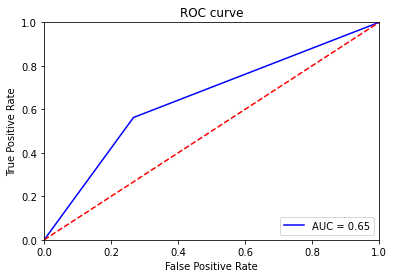

In [293]:
plot_roc_curve(y_test_final_log,y_pred_final_log)

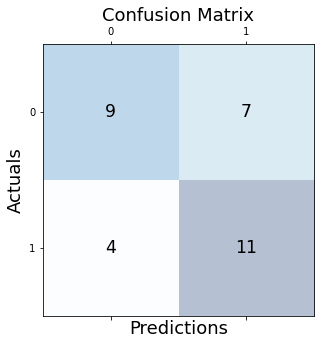

In [265]:
plot_confusion_matrix1(y_test_final_log,y_pred_final_log)

# SVM

In [266]:
max0 = 0
y_pred_final_svm = []
y_test_final_svm = []
for train_index,test_index in skf.split(X, y):
    X_train_svm,X_test_svm = X.iloc[train_index], X.iloc[test_index]
    y_train_svm,y_test_svm = y.iloc[train_index], y.iloc[test_index]
    svm = SVC()
    hyperparameters = {'C': [100, 0.001, 1.01, 0.01, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
    clf_svm = GridSearchCV(svm, hyperparameters, cv=5, verbose=0)
    best_model = clf_svm.fit(X_train_svm, y_train_svm)
    print("**************************************************************")
    print('Best Parameters',clf_svm.best_params_)
    print('Best Gammma:', best_model.best_estimator_.get_params()['gamma'])
    print('Best C:', best_model.best_estimator_.get_params()['C'])
    print('Best Kernel:', best_model.best_estimator_.get_params()['kernel'])
    y_pred_svm = clf_svm.predict(X_test_svm)
    print("Accuracy Score: ", accuracy_score(y_test_svm, y_pred_svm))
    if accuracy_score(y_test_svm, y_pred_svm) > max0:
        max0 = accuracy_score(y_test_svm, y_pred_svm)
        y_test_final_svm = list(y_test_svm)
        y_pred_final_svm = list(y_pred_svm)
        X_test_final_svm = list(X_test_svm)

**************************************************************
Best Parameters {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Gammma: 1
Best C: 10
Best Kernel: rbf
Accuracy Score:  0.6451612903225806
**************************************************************
Best Parameters {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best Gammma: 1
Best C: 10
Best Kernel: linear
Accuracy Score:  0.6333333333333333
**************************************************************
Best Parameters {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Gammma: 1
Best C: 10
Best Kernel: rbf
Accuracy Score:  0.7
**************************************************************
Best Parameters {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best Gammma: 1
Best C: 10
Best Kernel: linear
Accuracy Score:  0.8


In [267]:
print("Accuracy for SVM model: ", accuracy_score(y_test_final_svm, y_pred_final_svm))
print("Precision for SVM model: ", precision_score(y_test_final_svm, y_pred_final_svm))
print("Recall for SVM model: ", recall_score(y_test_final_svm, y_pred_final_svm))
print("F1 Score for SVM model: ", f1_score(y_test_final_svm, y_pred_final_svm))
print("Classification Report: \n", classification_report(y_test_final_svm, y_pred_final_svm))
print("ROC: ",roc_curve(y_test_final_svm, y_pred_final_svm))
print("Area Under the curve: ", roc_auc_score(y_test_final_svm, y_pred_final_svm))

Accuracy for SVM model:  0.8
Precision for SVM model:  0.8
Recall for SVM model:  0.8
F1 Score for SVM model:  0.8000000000000002
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.80      0.80      0.80        15

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

ROC:  (array([0. , 0.2, 1. ]), array([0. , 0.8, 1. ]), array([2, 1, 0], dtype=int64))
Area Under the curve:  0.8


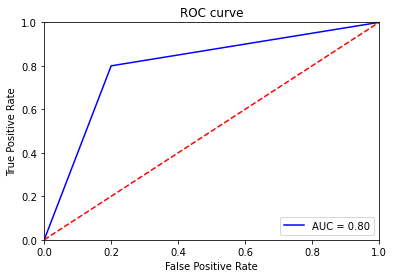

In [294]:
plot_roc_curve(y_test_final_svm,y_pred_final_svm)

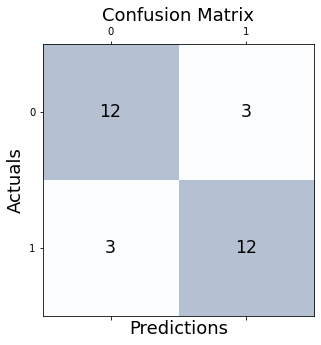

In [269]:
plot_confusion_matrix1(y_test_final_svm,y_pred_final_svm)

# Naive Bayes

Bernoulli Naive Bayes

In [271]:
max0 = 0
y_pred_final_bnb = []
y_test_final_bnb = []
for train_index,test_index in skf.split(X, y):
    X_train_bnb,X_test_bnb = X.iloc[train_index], X.iloc[test_index]
    y_train_bnb,y_test_bnb = y.iloc[train_index], y.iloc[test_index]
    bnb = BernoulliNB()
    hyperparameters = {'alpha':[10,20,30,40]}
    clf_bnb = GridSearchCV(bnb, hyperparameters, cv=5, verbose=0)
    best_model = clf_bnb.fit(X_train_bnb, y_train_bnb)
    print("**************************************************************")
    print('Best Parameters',clf_bnb.best_params_)
    print('Best Alpha:', best_model.best_estimator_.get_params()['alpha'])
    y_pred_bnb = clf_bnb.predict(X_test_bnb)
    print("Accuracy Score: ", accuracy_score(y_test_bnb, y_pred_bnb))
    if accuracy_score(y_test_bnb, y_pred_bnb) > max0:
        max0 = accuracy_score(y_test_bnb, y_pred_bnb)
        y_test_final_bnb = list(y_test_bnb)
        y_pred_final_bnb = list(y_pred_bnb)
        X_test_final_bnb = list(X_test_bnb)

**************************************************************
Best Parameters {'alpha': 10}
Best Alpha: 10
Accuracy Score:  0.4838709677419355
**************************************************************
Best Parameters {'alpha': 10}
Best Alpha: 10
Accuracy Score:  0.5
**************************************************************
Best Parameters {'alpha': 10}
Best Alpha: 10
Accuracy Score:  0.5
**************************************************************
Best Parameters {'alpha': 10}
Best Alpha: 10
Accuracy Score:  0.5


In [272]:
print("Accuracy for Bernoulli Naive Bayes model: ", accuracy_score(y_test_final_bnb, y_pred_final_bnb))
print("Precision for Bernoulli Naive Bayes model: ", precision_score(y_test_final_bnb, y_pred_final_bnb))
print("Recall for Bernoulli Naive Bayes model: ", recall_score(y_test_final_bnb, y_pred_final_bnb))
print("F1 Score for Bernoulli Naive Bayes model: ", f1_score(y_test_final_bnb, y_pred_final_bnb))
print("Classification Report: \n", classification_report(y_test_final_bnb, y_pred_final_bnb))
print("ROC: ",roc_curve(y_test_final_bnb, y_pred_final_bnb))
print("Area Under the curve: ", roc_auc_score(y_test_final_bnb, y_pred_final_bnb))

Accuracy for Bernoulli Naive Bayes model:  0.5
Precision for Bernoulli Naive Bayes model:  0.5
Recall for Bernoulli Naive Bayes model:  1.0
F1 Score for Bernoulli Naive Bayes model:  0.6666666666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      1.00      0.67        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

ROC:  (array([0., 1.]), array([0., 1.]), array([2, 1], dtype=int64))
Area Under the curve:  0.5


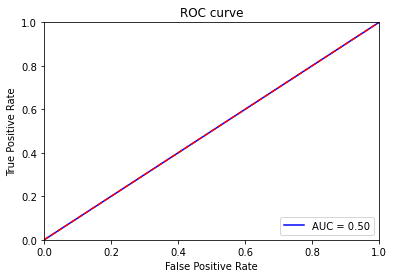

In [295]:
plot_roc_curve(y_test_final_bnb, y_pred_final_bnb)

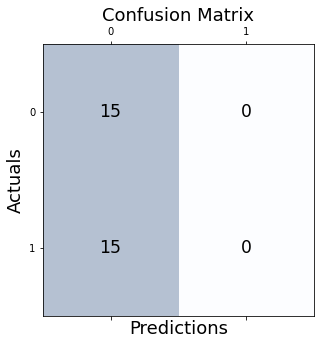

In [274]:
plot_confusion_matrix1(y_test_final_bnb, y_pred_final_bnb)

Gaussian Naive Bayes

In [275]:
max0 = 0
y_pred_final_gnb = []
y_test_final_gnb = []
for train_index,test_index in skf.split(X, y):
    X_train_gnb,X_test_gnb = X.iloc[train_index], X.iloc[test_index]
    y_train_gnb,y_test_gnb = y.iloc[train_index], y.iloc[test_index]
    gnb = GaussianNB()
    hyperparameters = {'var_smoothing': [0.1, 0.02, 0.004, 0.005, 0.8]}
    clf_gnb = GridSearchCV(gnb, hyperparameters,cv=5, verbose=0)
    best_model = clf_gnb.fit(X_train_gnb, y_train_gnb)
    print("**************************************************************")
    print('Best Parameters',clf_gnb.best_params_)
    print('Best Variance smoothing:', best_model.best_estimator_.get_params()['var_smoothing'])
    y_pred_gnb = clf_gnb.predict(X_test_gnb)
    print("Accuracy Score: ", accuracy_score(y_test_gnb, y_pred_gnb))
    if accuracy_score(y_test_gnb, y_pred_gnb) > max0:
        max0 = accuracy_score(y_test_gnb, y_pred_gnb)
        y_test_final_gnb = list(y_test_gnb)
        y_pred_final_gnb = list(y_pred_gnb)
        X_test_final_gnb = list(X_test_gnb)

**************************************************************
Best Parameters {'var_smoothing': 0.1}
Best Variance smoothing: 0.1
Accuracy Score:  0.6774193548387096
**************************************************************
Best Parameters {'var_smoothing': 0.8}
Best Variance smoothing: 0.8
Accuracy Score:  0.5666666666666667
**************************************************************
Best Parameters {'var_smoothing': 0.02}
Best Variance smoothing: 0.02
Accuracy Score:  0.5
**************************************************************
Best Parameters {'var_smoothing': 0.004}
Best Variance smoothing: 0.004
Accuracy Score:  0.4666666666666667


In [276]:
print("Accuracy for Gaussian Naive Bayes model: ", accuracy_score(y_test_final_gnb, y_pred_final_gnb))
print("Precision for Gaussian Naive Bayes model: ", precision_score(y_test_final_gnb, y_pred_final_gnb))
print("Recall for Gaussian Naive Bayes model: ", recall_score(y_test_final_gnb, y_pred_final_gnb))
print("F1 Score for Gaussian Naive Bayes model: ", f1_score(y_test_final_gnb, y_pred_final_gnb))
print("Classification Report: \n", classification_report(y_test_final_gnb, y_pred_final_gnb))
print("ROC: ",roc_curve(y_test_final_gnb, y_pred_final_gnb))
print("Area Under the curve: ", roc_auc_score(y_test_final_gnb, y_pred_final_gnb))

Accuracy for Gaussian Naive Bayes model:  0.6774193548387096
Precision for Gaussian Naive Bayes model:  0.6875
Recall for Gaussian Naive Bayes model:  0.6875
F1 Score for Gaussian Naive Bayes model:  0.6875
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.69      0.69      0.69        16

    accuracy                           0.68        31
   macro avg       0.68      0.68      0.68        31
weighted avg       0.68      0.68      0.68        31

ROC:  (array([0.        , 0.33333333, 1.        ]), array([0.    , 0.6875, 1.    ]), array([2, 1, 0], dtype=int64))
Area Under the curve:  0.6770833333333335


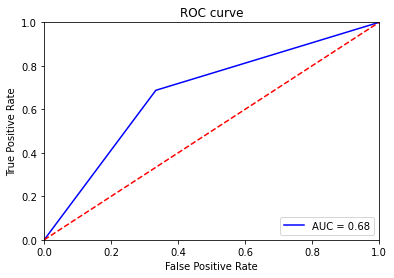

In [296]:
plot_roc_curve(y_test_final_gnb, y_pred_final_gnb)

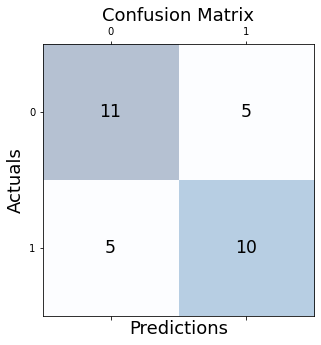

In [278]:
plot_confusion_matrix1(y_test_final_gnb, y_pred_final_gnb)

# KNN

In [279]:
max0 = 0
y_pred_final_knn = []
y_test_final_knn = []
for train_index,test_index in skf.split(X, y):
    X_train_knn,X_test_knn = X.iloc[train_index], X.iloc[test_index]
    y_train_knn,y_test_knn = y.iloc[train_index], y.iloc[test_index]
    knn = KNeighborsClassifier()
    hyperparameters = {'n_neighbors': [2,3,4,5,6],'p':[1,2,3]}
    clf_knn = GridSearchCV(knn, hyperparameters,cv=5, verbose=0)
    best_model = clf_knn.fit(X_train_knn, y_train_knn)
    print("**************************************************************")
    print('Best Parameters',clf_knn.best_params_)
    print('Best Number of neighbors :', best_model.best_estimator_.get_params()['n_neighbors'])
    print('Best p :', best_model.best_estimator_.get_params()['p'])
    y_pred_knn = clf_knn.predict(X_test_knn)
    print("Accuracy Score: ", accuracy_score(y_test_knn, y_pred_knn))
    if accuracy_score(y_test_knn, y_pred_knn) > max0:
        max0 = accuracy_score(y_test_knn, y_pred_knn)
        y_test_final_knn = list(y_test_knn)
        y_pred_final_knn = list(y_pred_knn)
        X_test_final_knn = list(X_test_knn)

**************************************************************
Best Parameters {'n_neighbors': 3, 'p': 2}
Best Number of neighbors : 3
Best p : 2
Accuracy Score:  0.6451612903225806
**************************************************************
Best Parameters {'n_neighbors': 6, 'p': 2}
Best Number of neighbors : 6
Best p : 2
Accuracy Score:  0.6666666666666666
**************************************************************
Best Parameters {'n_neighbors': 3, 'p': 1}
Best Number of neighbors : 3
Best p : 1
Accuracy Score:  0.6
**************************************************************
Best Parameters {'n_neighbors': 6, 'p': 2}
Best Number of neighbors : 6
Best p : 2
Accuracy Score:  0.4666666666666667


In [280]:
print("Accuracy for KNN model: ", accuracy_score(y_test_final_knn, y_pred_final_knn))
print("Precision for KNN model: ", precision_score(y_test_final_knn, y_pred_final_knn))
print("Recall for KNN model: ", recall_score(y_test_final_knn, y_pred_final_knn))
print("F1 Score for KNN model: ", f1_score(y_test_final_knn, y_pred_final_knn))
print("Classification Report: \n", classification_report(y_test_final_knn, y_pred_final_knn))
print("ROC: ",roc_curve(y_test_final_knn, y_pred_final_knn))
print("Area Under the curve: ", roc_auc_score(y_test_final_knn, y_pred_final_knn))

Accuracy for KNN model:  0.6666666666666666
Precision for KNN model:  0.6666666666666666
Recall for KNN model:  0.6666666666666666
F1 Score for KNN model:  0.6666666666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.67      0.67      0.67        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

ROC:  (array([0.        , 0.33333333, 1.        ]), array([0.        , 0.66666667, 1.        ]), array([2, 1, 0], dtype=int64))
Area Under the curve:  0.6666666666666667


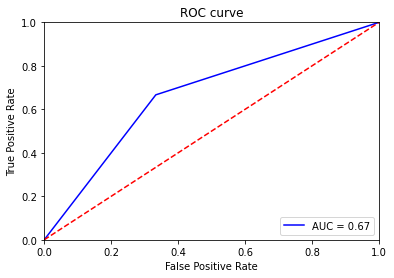

In [297]:
plot_roc_curve(y_test_final_knn, y_pred_final_knn)

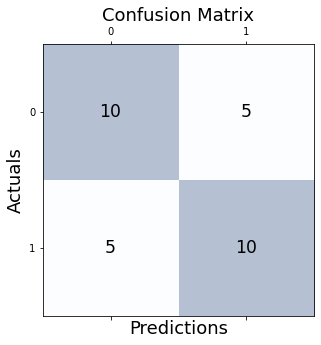

In [282]:
plot_confusion_matrix1(y_test_final_knn, y_pred_final_knn)

# Decision tree

In [283]:
max0 = 0
y_pred_final_dt = []
y_test_final_dt = []
for train_index,test_index in skf.split(X, y):
    X_train_dt,X_test_dt = X.iloc[train_index], X.iloc[test_index]
    y_train_dt,y_test_dt = y.iloc[train_index], y.iloc[test_index]
    dt = DecisionTreeClassifier()
    hyperparameters = {'criterion':['gini', 'entropy'],'splitter':['best', 'rando'],'max_depth':[4,5,6,7]}
    clf_dt = GridSearchCV(dt, hyperparameters,cv=5, verbose=0)
    best_model = clf_dt.fit(X_train_dt, y_train_dt)
    print("**************************************************************")
    print('Best Parameters',clf_dt.best_params_)
    print('Best Criterion :', best_model.best_estimator_.get_params()['criterion'])
    print('Best splitter :', best_model.best_estimator_.get_params()['splitter'])
    print('Best max_depth :', best_model.best_estimator_.get_params()['max_depth'])
    y_pred_dt = clf_dt.predict(X_test_dt)
    print("Accuracy Score: ", accuracy_score(y_test_dt, y_pred_dt))
    if accuracy_score(y_test_dt, y_pred_dt) > max0:
        max0 = accuracy_score(y_test_dt, y_pred_dt)
        y_test_final_dt = list(y_test_dt)
        y_pred_final_dt = list(y_pred_dt)
        X_test_final_dt = list(X_test_dt)

**************************************************************
Best Parameters {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
Best Criterion : entropy
Best splitter : best
Best max_depth : 5
Accuracy Score:  0.41935483870967744
**************************************************************
Best Parameters {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
Best Criterion : entropy
Best splitter : best
Best max_depth : 6
Accuracy Score:  0.7333333333333333
**************************************************************
Best Parameters {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
Best Criterion : entropy
Best splitter : best
Best max_depth : 6
Accuracy Score:  0.6333333333333333
**************************************************************
Best Parameters {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}
Best Criterion : entropy
Best splitter : best
Best max_depth : 7
Accuracy Score:  0.6333333333333333


In [284]:
print("Accuracy for Decison Tree model: ", accuracy_score(y_test_final_dt, y_pred_final_dt))
print("Precision for Decison Tree model: ", precision_score(y_test_final_dt, y_pred_final_dt))
print("Recall for Decison Tree model: ", recall_score(y_test_final_dt, y_pred_final_dt))
print("F1 Score for Decison Tree model: ", f1_score(y_test_final_dt, y_pred_final_dt))
print("Classification Report: \n", classification_report(y_test_final_dt, y_pred_final_dt))
print("ROC: ",roc_curve(y_test_final_dt, y_pred_final_dt))
print("Area Under the curve: ", roc_auc_score(y_test_final_dt, y_pred_final_dt))

Accuracy for Decison Tree model:  0.7333333333333333
Precision for Decison Tree model:  0.7333333333333333
Recall for Decison Tree model:  0.7333333333333333
F1 Score for Decison Tree model:  0.7333333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.73      0.73      0.73        15

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30

ROC:  (array([0.        , 0.26666667, 1.        ]), array([0.        , 0.73333333, 1.        ]), array([2, 1, 0], dtype=int64))
Area Under the curve:  0.7333333333333334


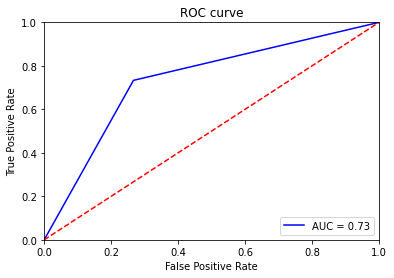

In [298]:
plot_roc_curve(y_test_final_dt, y_pred_final_dt)

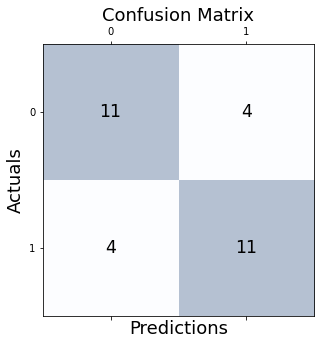

In [286]:
plot_confusion_matrix1(y_test_final_dt, y_pred_final_dt)

# Random Forest Classifier

In [287]:
max0 = 0
y_pred_final_rfc = []
y_test_final_rfc = []
for train_index,test_index in skf.split(X, y):
    X_train_rfc,X_test_rfc = X.iloc[train_index], X.iloc[test_index]
    y_train_rfc,y_test_rfc = y.iloc[train_index], y.iloc[test_index]
    rfc = RandomForestClassifier()
    hyperparameters = {'criterion':['gini', 'entropy'],'n_estimators':[10,20,30,40,50],'max_depth':[4,5,6,7]}
    clf_rfc = GridSearchCV(rfc, hyperparameters,cv=5, verbose=0)
    best_model = clf_rfc.fit(X_train_rfc, y_train_rfc)
    print("**************************************************************")
    print('Best Parameters',clf_rfc.best_params_)
    print('Best Criterion :', best_model.best_estimator_.get_params()['criterion'])
    print('Best estimators :', best_model.best_estimator_.get_params()['n_estimators'])
    print('Best max_depth :', best_model.best_estimator_.get_params()['max_depth'])
    y_pred_rfc = clf_rfc.predict(X_test_rfc)
    print("Accuracy Score: ", accuracy_score(y_test_rfc, y_pred_rfc))
    if accuracy_score(y_test_rfc, y_pred_rfc) > max0:
        max0 = accuracy_score(y_test_rfc, y_pred_rfc)
        y_test_final_rfc = list(y_test_rfc)
        y_pred_final_rfc = list(y_pred_rfc)
        X_test_final_rfc = list(X_test_rfc)

**************************************************************
Best Parameters {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 30}
Best Criterion : entropy
Best estimators : 30
Best max_depth : 7
Accuracy Score:  0.7096774193548387
**************************************************************
Best Parameters {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 40}
Best Criterion : entropy
Best estimators : 40
Best max_depth : 7
Accuracy Score:  0.6
**************************************************************
Best Parameters {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}
Best Criterion : gini
Best estimators : 10
Best max_depth : 5
Accuracy Score:  0.6
**************************************************************
Best Parameters {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 40}
Best Criterion : entropy
Best estimators : 40
Best max_depth : 6
Accuracy Score:  0.7


In [288]:
print("Accuracy for Random Forest classifier model: ", accuracy_score(y_test_final_rfc, y_pred_final_rfc))
print("Precision for Random Forest classifier model: ", precision_score(y_test_final_rfc, y_pred_final_rfc))
print("Recall for Random Forest classifier model: ", recall_score(y_test_final_rfc, y_pred_final_rfc))
print("F1 Score for Random Forest classifier model: ", f1_score(y_test_final_rfc, y_pred_final_rfc))
print("Classification Report: \n", classification_report(y_test_final_rfc, y_pred_final_rfc))
print("ROC: ",roc_curve(y_test_final_rfc, y_pred_final_rfc))
print("Area Under the curve: ", roc_auc_score(y_test_final_rfc, y_pred_final_rfc))

Accuracy for Random Forest classifier model:  0.7096774193548387
Precision for Random Forest classifier model:  0.7333333333333333
Recall for Random Forest classifier model:  0.6875
F1 Score for Random Forest classifier model:  0.7096774193548386
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.73      0.69      0.71        16

    accuracy                           0.71        31
   macro avg       0.71      0.71      0.71        31
weighted avg       0.71      0.71      0.71        31

ROC:  (array([0.        , 0.26666667, 1.        ]), array([0.    , 0.6875, 1.    ]), array([2, 1, 0], dtype=int64))
Area Under the curve:  0.7104166666666667


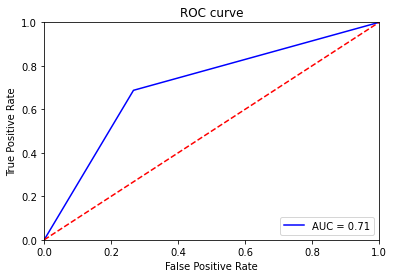

In [299]:
plot_roc_curve(y_test_final_rfc, y_pred_final_rfc)

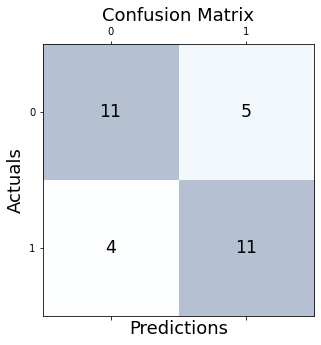

In [290]:
plot_confusion_matrix1(y_test_final_rfc, y_pred_final_rfc)

# Conclusion

ADHD dataset was considred for this assignment. This dataset consists of two classes ADHD and Control where ADHD means the person is affected with Attention deficit hyperactivity disorder and control means the person is normal.<br/>
Each class had mat files where one mat file represents one persons eeg data.These mat files were converted to csv files.Then each csv file which was a 2d matrix which was converted to a vector with average mutual information of every feature which was calculated feature wise.<br/>
The labels were also added to these vectors were:-<br/>
1 -> ADHD class <br/>
0 -> Control class <br/>
By finding the minimum mutual information for each feature topoplot was plotted for both the classes.<br/>
PCA was performed on the dataset which had 121 rows and 20 columns. The dataset was reduced to a 2 dimensions and was plotted to check if it was linearly separable.The data was not linearly separable.<br/>
Then with the help of plotted with explained variance ratio and number of features the optimum number of features for PCA was found. Therefore, for ADHD dataset we require atleast 5 features in order to perform PCA.<br/>
Finally the dataset was tested against various machine learning models along with gridsearchcv for hyperparameter tuning. For each model the best results are summarised below :-<br/>
1. Perceptron for classification with accuracy 70%
2. Logistic Regression with accuracy 64.5%
3. SVM (different kernels) with accuracy 80%
4. Naive Bayes
    a. Benolli Naive Bayes with accuracy 50%
    b. Gaussian Naive Bayes with accuracy 67.7%
5. KNN with accuracy 66.6%
6. Decision Tree with accuracy 73.3%
7. Random Forest Classifier with accuracy 70.9%
<br/><br/>
From the above results we can conclude that SVM performed well on ADHD dataset with not only good accuracy but also good precison,recall and F1-score as well
